In [13]:
import numpy as np
import pandas as pd

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the citipy module to determine city based on latitude and longitude.
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
from citipy import citipy

In [17]:
# # Use the tuple() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [19]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 3 of Set 1 | rena
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | dzilam gonzalez
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | meulaboh
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | xichang
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | beidao
Processing Record 14 of Set 1 | krotoszyn
Processing Record 15 of Set 1 | zlotow
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | tyukhtet
Processing Record 18 of Set 1 | karamay
City not found. Skipping...
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | perle
P

Processing Record 38 of Set 4 | berlevag
Processing Record 39 of Set 4 | vila franca do campo
Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | jalingo
Processing Record 42 of Set 4 | lashio
Processing Record 43 of Set 4 | kendari
Processing Record 44 of Set 4 | satitoa
City not found. Skipping...
Processing Record 45 of Set 4 | kawana waters
City not found. Skipping...
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | axim
Processing Record 48 of Set 4 | kurtamysh
Processing Record 49 of Set 4 | batagay-alyta
Processing Record 50 of Set 4 | kaitangata
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | khandyga
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | magdagachi
Processing Record 6 of Set 5 | san policarpo
Processing Record 7 of Set 5 | mandan
Processing Record 8 of Set 5 | celestun
Processing Record 9 of Set 5 | talnakh
Processing Record 10 of S

Processing Record 26 of Set 8 | boma
Processing Record 27 of Set 8 | kavieng
Processing Record 28 of Set 8 | faya
Processing Record 29 of Set 8 | ndola
Processing Record 30 of Set 8 | novyy urengoy
Processing Record 31 of Set 8 | kokoda
Processing Record 32 of Set 8 | kuminskiy
Processing Record 33 of Set 8 | jutai
Processing Record 34 of Set 8 | saint-philippe
Processing Record 35 of Set 8 | cherskiy
Processing Record 36 of Set 8 | banjar
Processing Record 37 of Set 8 | kubachi
Processing Record 38 of Set 8 | goias
Processing Record 39 of Set 8 | moratuwa
Processing Record 40 of Set 8 | maxixe
Processing Record 41 of Set 8 | providencia
Processing Record 42 of Set 8 | santa fe
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | solnechnyy
Processing Record 45 of Set 8 | aflu
City not found. Skipping...
Processing Record 46 of Set 8 | fairbanks
Processing Record 47 of Set 8 | westport
Processing Record 48 of Set 8 | quimper
Processing Record 49 of Set 8 | kahul

Processing Record 16 of Set 12 | sibu
Processing Record 17 of Set 12 | rasra
Processing Record 18 of Set 12 | kavaratti
Processing Record 19 of Set 12 | guane
Processing Record 20 of Set 12 | touros
Processing Record 21 of Set 12 | teknaf
Processing Record 22 of Set 12 | can
Processing Record 23 of Set 12 | villa rica
Processing Record 24 of Set 12 | yar-sale
Processing Record 25 of Set 12 | marrakesh
Processing Record 26 of Set 12 | alice town
Processing Record 27 of Set 12 | sobolevo
Processing Record 28 of Set 12 | reykjavik
Processing Record 29 of Set 12 | dingle
Processing Record 30 of Set 12 | hakkari
Processing Record 31 of Set 12 | sao marcos
Processing Record 32 of Set 12 | tarudant
City not found. Skipping...
Processing Record 33 of Set 12 | muravlenko
Processing Record 34 of Set 12 | labrea
Processing Record 35 of Set 12 | mulchen
Processing Record 36 of Set 12 | samusu
City not found. Skipping...
Processing Record 37 of Set 12 | sur
Processing Record 38 of Set 12 | joshimat

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,45.75,81,90,7.72,NZ,2022-05-22 22:32:59
1,Rena,61.1348,11.3641,46.81,96,88,3.53,NO,2022-05-22 22:33:42
2,Rikitea,-23.1203,-134.9692,75.65,77,12,14.36,PF,2022-05-22 22:33:42
3,Dzilam Gonzalez,21.2833,-88.9333,89.82,47,60,3.27,MX,2022-05-22 22:33:43
4,Nikolskoye,59.7035,30.7861,40.91,61,17,3.36,RU,2022-05-22 22:33:43
5,Meulaboh,4.1363,96.1285,76.60,89,100,2.82,ID,2022-05-22 22:33:03
6,Xichang,27.8964,102.2634,62.22,85,99,0.18,CN,2022-05-22 22:33:43
7,Norman Wells,65.2820,-126.8329,48.24,43,75,5.75,CA,2022-05-22 22:33:44
8,Bluff,-46.6000,168.3333,51.64,73,100,28.99,NZ,2022-05-22 22:32:55
9,Cape Town,-33.9258,18.4232,62.38,86,0,2.30,ZA,2022-05-22 22:32:37


In [24]:
# Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:
# new_column_order = ["column2", "column4", "column1"]
# Then, we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]

In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1653259186.3182583

In [28]:
# # get today's time in seconds
today = time.strftime("%x")
today

'05/22/22'

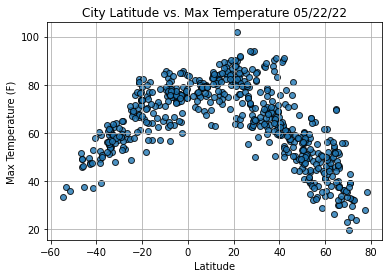

In [31]:
# Import time module
import time
from matplotlib import pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

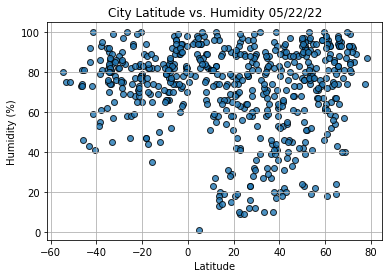

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

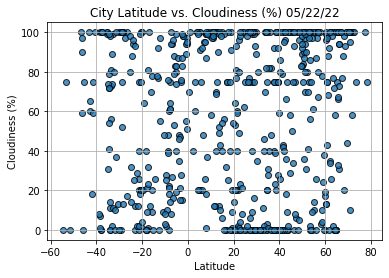

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

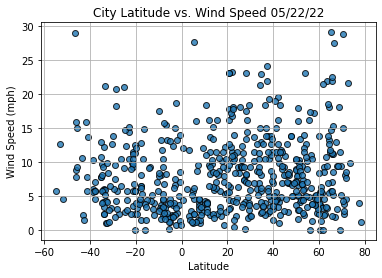

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()